# 07. 군집화(Clustering)
## 01. K-평균 알고리즘 이해 : 군집화에서 가장 일반적으로 사용되는 알고리즘
- K-평균: 군집 중심점(centroid)라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 군집 중심점: 선택된 포인트의평균지점으로 이동 -> 이동된 중심점에서 다시가까운 포인트 선택 -> 중심점을 평균지점으로 이동 = 반복 수행  
  => 더이상 중심점 이동이 없을 경우 반복 멈춤 , 해당 중심점에 속하는 데이터 포인트들을 군집화  
  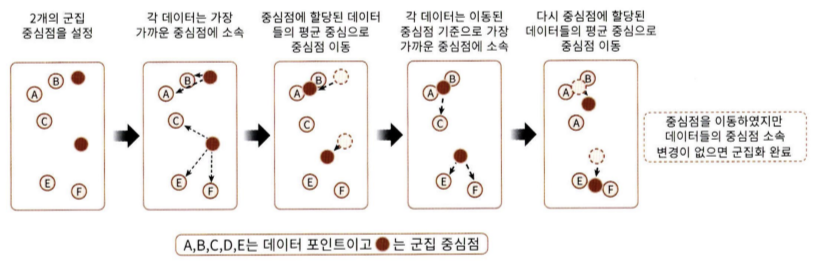
- 장점
  1. 일반적인 군집화에서 가장 많이 횔용되는 알고리즘
  2. 알고리즘이 쉽고 간결
- 단점
  1. 거리 기반 알고리즘 -> 속성의 개수가 많을 경우 군집화 정확도가 떨어짐 (-> 방지하기 위해 PCA로 차원 감소 적용)
  2. 반복 수행-> 횟수가 많을 경우 수행 시간이 매우 느려짐
  3. 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움
#### 사이킷런 KMeans 클래스 소개 

```python
class sklearn.cluster.Kmeans(n_cluster = 8, init = 'k-means++', n_init = 10, max_iter = 300, tol=0.0001, 
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')
```

- KMeans 초기화 중요 파라미터
  - n_clusters: 군집화할 개수 = 군집 중심점의 개수 -> 가장 중요
  - init: 초기에 군집 중심점의 좌표를 설정할 방식 -> 보통 임의로 중심을 설정하 않고 일반적으로 k-means++ 방식으로 최초설정
  - max_iter: 최대 반복 횟수 -> 설정 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
- KMeans 주요 속성
  - labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
  - cluster_centers_: 각 군집 중심점 좌표(Shape: [군집 개수, 피처 개수]) -> 군집 중심점 좌표 시각화 가능
#### K-평균을 이용한 붓꽃 데이터 세트 군집화 

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환 
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


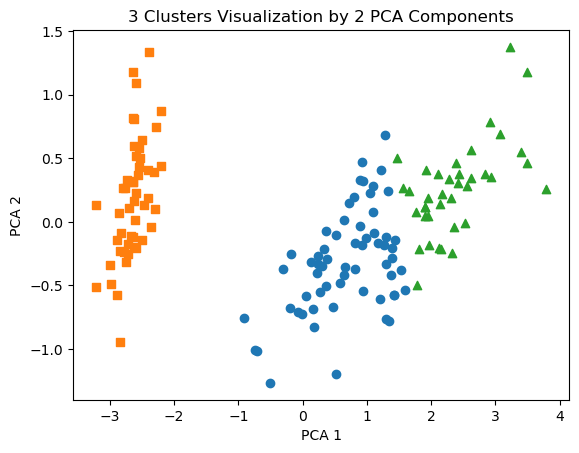

In [7]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출 
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시 
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

-> Cluster0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재

#### 군집화 알고리즘 테스트를 위한 데이터 생성
- 군집화용 데이터 생성기: make_bolbs(), make_classification()
- make_blobs() 호출 파라미터
  - n_samples: 생성할 총 데이터 개수(default=100)
  - n_features: 데이터 피처 개수 (x,y)
  - centers: int값->군집의 개수, ndarray->개별 군집 중심점의 좌표
  - cluster_std: 생성될 군집 데이터의 표준 편차 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


-> 피처 데이터 세트: 200개의 레코드와 2개의 피처 shape-(200,2)  
-> 군집 타깃 데이터 세트: shape-(200,), cluster값-[0,1,2], cluster 구성-각 67,67,66개  

In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


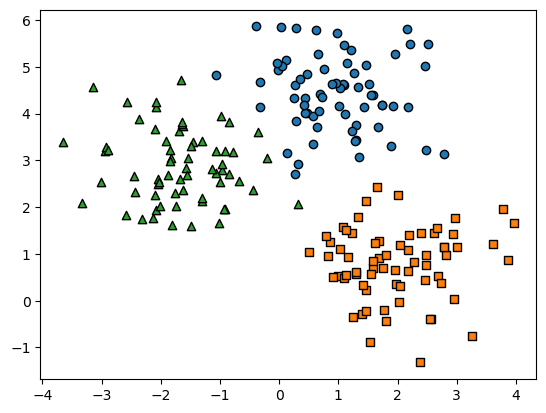

In [14]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

- KMeans 군집화 수행 -> 군집별 시각화 : cluster_centers_ 속성-> 개별 군집의 중심 위치 좌표 

C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


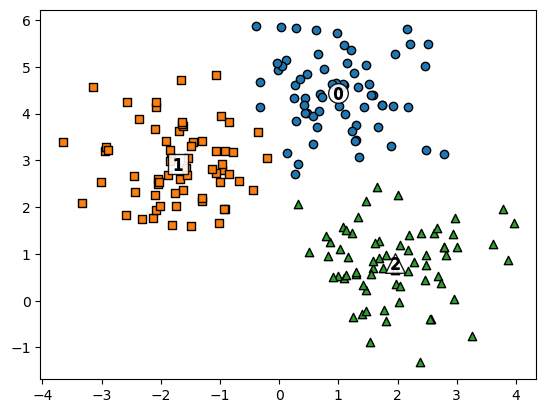

In [17]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y= centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor ='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [18]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: count, dtype: int64


=> cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음을 알 수 있음

## 02.군집 평가(Cluster Evaluation)
- 군집화의 특징
  - 분류와 유사해보일 수 있지만, 성격이 많이 다름
  - 데이터 내 숨어있는 별도 그룹을 찾아서 의미 부여 or 동일한 분류값에 속해도 그 안에 더 세분화된 군집화 추구 or 서로 다른 분류값 데이터도 더 넓은 군집화 레벨화 등의 영역
- 군집화 평가 지표  
  : 비지도 학습 특성상 정확한 평가는 어렵지만, 대표적인 방법은 실루엣 분석

#### 실루엣 분석의 개요
- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄  
  -> 효율적으로 잘 분리됨: 다른 군집과의 거리는 떨어져있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있음 
  - 실루엣 계수(silhouette coefficient) 기반  
    : 개별 데이터가 가지는 군집화 지표 -> 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고, 다른 군집 데이터와 얼마나 멀리 분리되어있는지 나타내는 지표    
    -> a(i), b(i) 기반으로 계산: i 번째 데이터 포인트의 실루엣계수 값 s(i)  
    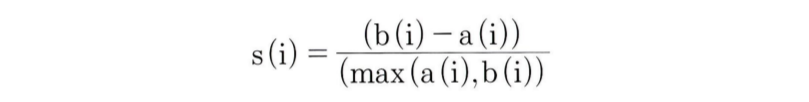   
    - a(i): 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
    - b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리  
      =>실루엣 계수: -1 ~ 1 사이의 값
        - 1로 가까울수록 근처 군집과 멀리 떨어짐
        - 0으로 가까울수록 근처 군집과 가까워짐
        - 음수값은 다른 군집에 데이터 포인트 할당됨 
    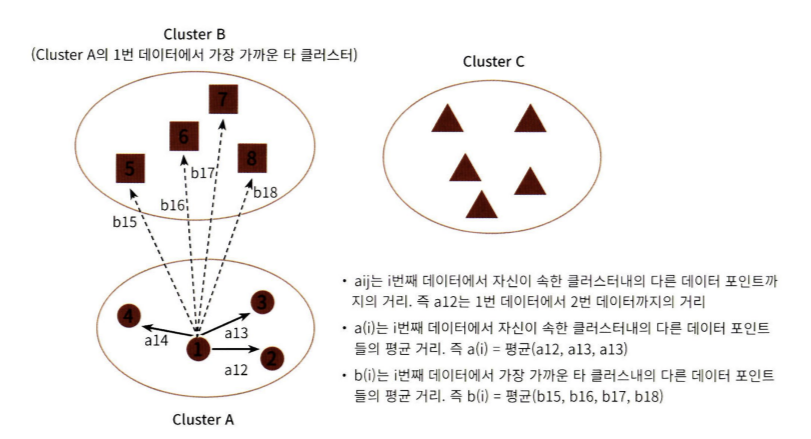  
- 좋은 군집화의 조건  
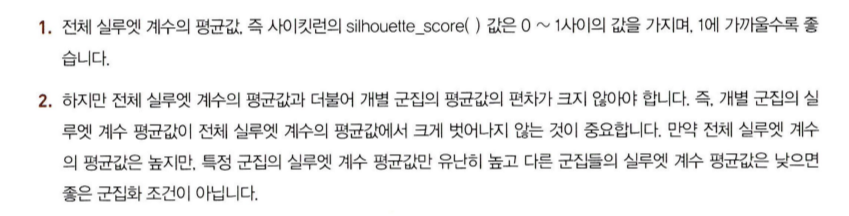

#### 붓꽃 데이터 세트를 이용한 군집 평가: silhouette_samples() & silhouette_score() 이용

In [28]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


-> 1번 군집이 높은 실루엣 계수 값을 가짐 -> 1번 군집이 아닌 다른 군집의 경우 실루엣 값이 평균보다 낮기 때문 

In [29]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

-> 1번 군집에 비해 0,2번은 실루엣 계수 평균값이 상대적으로 작음

#### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법 
: 개별 군집별로 적당히 분리된 거리 유지+군집 내의 데이터가 서로 뭉쳐있는 경우 -> K-평균의 적절한 군집 계수가 설정되었다고 판단 
1. 데이터에 대해 군집의 개수 2개를 정했을 때: 평균 실루엣 계수(silhouette_score)=0.704 -> 매우 높게 나타남
   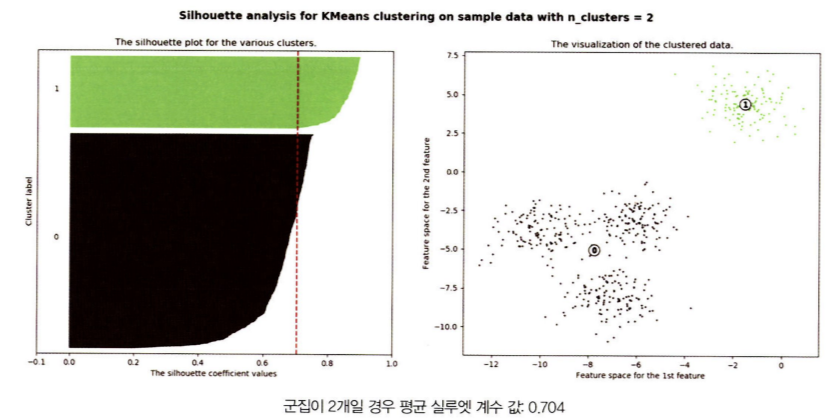  
   -> 1번 군집의 경우, 0번 군집과 멀리 떨어져 있고, 내부 데이터끼리도 잘 뭉쳐져 있음: 평균 실루엣 계수 값 이상  
   -> 0번 군집의 경우, 내부 데이터끼리 많이 떨어져 있음 : 평균보다 적은 데이터 값이 매우 많음  
   * 점선: 전체 평균 실루엣 계수 값
2. 군집 개수가 3개인 경우: 평균 실루엣 계수=0.588
   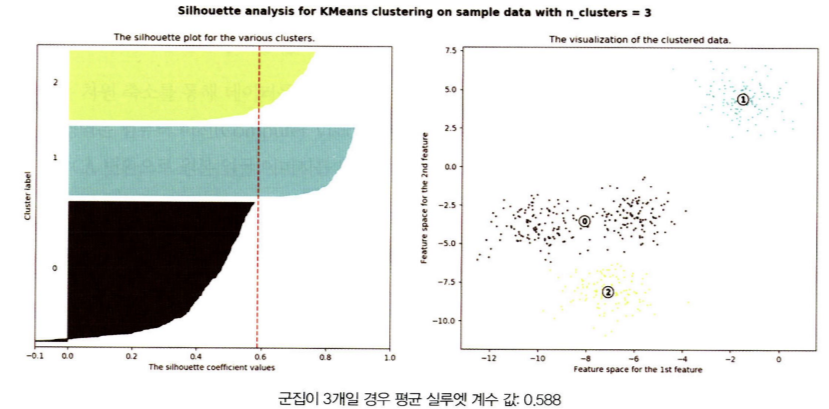  
   -> 1,2번 군집의 경우, 평균보다 높은 실루엣 계수 값 가짐
   -> 0번 군집의 경우, 모두 평균보다 낮음 : 내부 데이터간의 거리도 멀고, 2번 군집과도 가깝게 위치함
3. 군집 개수가 4개인 경우: 평균 실루엣 계수값 0.65 -> 비교적 균일한 개별 군집의 실루엣 계수 값 위치
   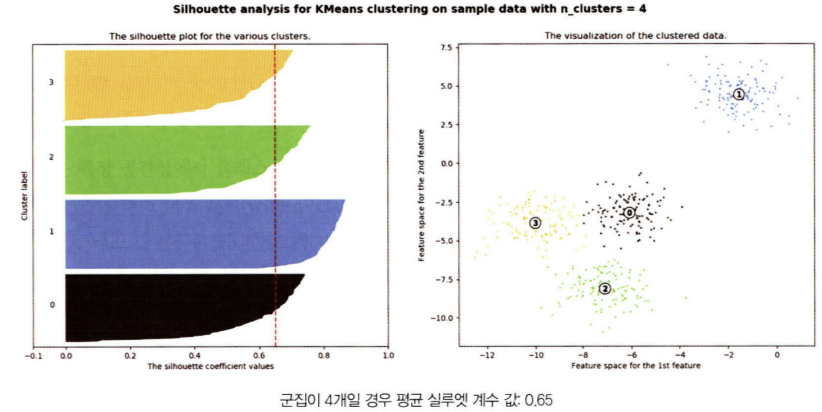  
   => 가장 이상적인 군집화 개수로 판단 가능
* 'https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html' 참고 하기
- visualize_silhouette()함수: 군집 개수 변화시키면서 K-평균 군집 수행했을 때 개별 군집별 평균 실루엣 계수값 시각화 -> 군집개수 정하는데 도움
=> 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 데이터 양이 늘어나면 수행시간이 크게 늘어남 -> 

In [30]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

- 2차원 데이터 세트를 만들고, K-평균으로 군집화할때 2,3,4,5개 중 최적 군집 개수 시각화

C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

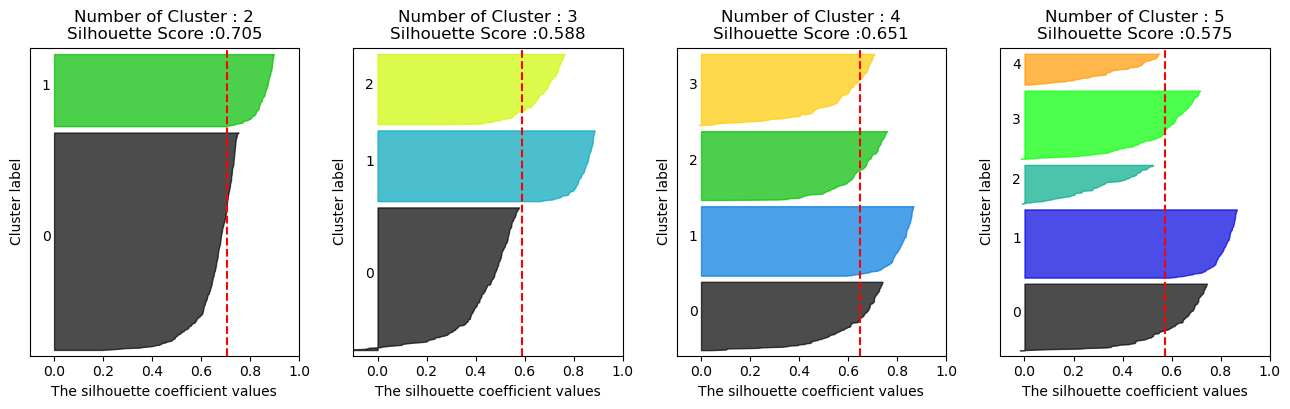

In [32]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성 
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개 일 때 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

- 붓꽃 데이터를 이용해 K-평균 수행 -> 최적 군집 개수 

C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leehj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

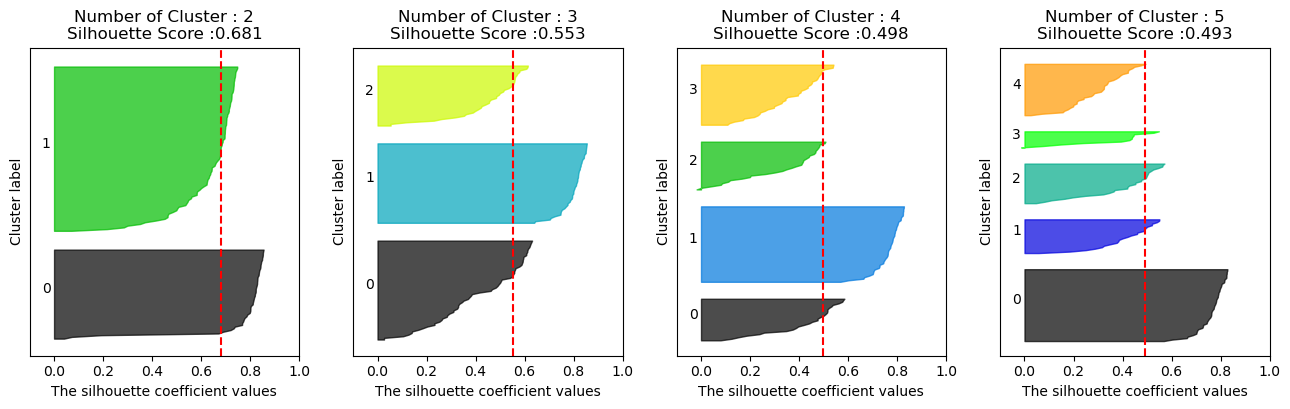

In [33]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

-> 군집 개수 2개가 가장 좋을 듯 (<- 3,4,5개일 경우, 평균 실루엣 계수 값도 2보다 작고 1번군집과 다른 군집과의 실루엣 계수 편차가 크게 나타남)